In [66]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import riskkit as erk
import scipy.stats as stats
from scipy.stats.mstats import gmean
from scipy.optimize import minimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## N-Asset Efficient Frontier

In [65]:
ind = erk.get_ind_returns()
indp = ind['1996':'2000']
er = erk.annualize_rets(indp, 12)
cov = indp.cov()

```python
def plot_ef(n_points, er, cov, style='.-'):
    """
    Plots the N-asset efficient frontier
    """
    weights = minimize_vol(target_return) ??? 
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        'Returns': rets,
        'Volatility': vols
    })
    return ef.plot.line(x='Volatility', y='Returns', style=style)
```

<AxesSubplot:xlabel='Volatility'>

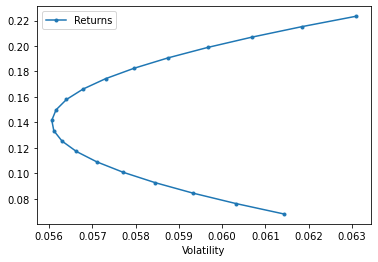

In [67]:
l = ['Games', 'Fin']
erk.plot_ef2(20, er[l], cov.loc[l, l])

In [69]:
def minimize_vol(target_return, er, cov):
    """
    Returns the weight vector responsible for the portfolio that generates target_return with minimum volatility
    """
    n = er.shape[0]
    initial_weights = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    return_is_target = {
        'type': 'eq',
        'fun': lambda w: target_return - erk.portfolio_return(w, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda w: w.sum() - 1        
    }
    results = minimize(erk.portfolio_vol, initial_weights, 
                       args=(cov,), method='SLSQP', 
                       options={'disp': True},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds)
    return results.x


In [81]:
erl = er[l]
covl = cov.loc[l, l]

w15 = erk.minimize_vol(.15, erl, covl)
ret15 = erk.portfolio_return(w15, erl)
vol15 = erk.portfolio_vol(w15, covl)
(ret15, vol15)

(0.15000000000209263, 0.056163669406706564)

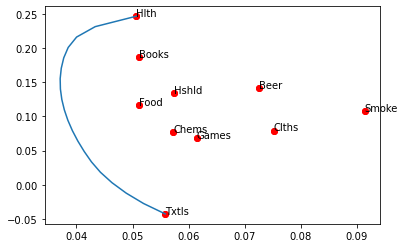

In [120]:
l = ['Smoke', 'Fin', 'Games', 'Coal']

erk.plot_ef_series(20, indp.iloc[:, range(10)], 12, annotate=True)